## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

## 데이터 로드

In [3]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [4]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

In [5]:
# 주문 취소 건 제외
df = df[df["UnitPrice"] > 0].copy()
df = df[df["Quantity"] > 0].copy()

In [6]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [7]:
# 데이터 타입 변경

df["Country"] = df["Country"].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     530104 non-null  category      
 1   StockCode     530104 non-null  category      
 2   Description   530104 non-null  category      
 3   Quantity      530104 non-null  int32         
 4   InvoiceDate   530104 non-null  datetime64[ns]
 5   UnitPrice     530104 non-null  float64       
 6   CustomerID    397884 non-null  float32       
 7   Country       530104 non-null  object        
 8   InvoiceMonth  530104 non-null  int64         
 9   TotalPrice    530104 non-null  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memory usage: 32.9+ MB



## 미션1) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
다음 국가에 대해 상관계수를 구하고 seaborn 의 lmplot을 사용하여 시각화 하고 심슨의 역설을 설명할 수 있는지 분석해 주세요.
또, 이를 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```


* 슬라이드 자료에서 "심슨의 역설"을 찾아주세요.

In [9]:
# 심슨의 역설을 확인할 그룹
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]

In [10]:
#나라 : all 추가
country_all = df[df['Country'].isin(country_group)].copy()
country_all["Country"] = "all"
df_all = pd.concat([country_all, df])
df_all["Country"].value_counts()

United Kingdom          485123
Germany                   9040
France                    8407
EIRE                      7890
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1966
Portugal                  1501
all                       1202
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA     

In [11]:
#필터링할 나라 + all을 country_group1에 재할당
country_group1 = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA", 'all']

country_filtered = df_all[df_all['Country'].isin(country_group1)].copy()

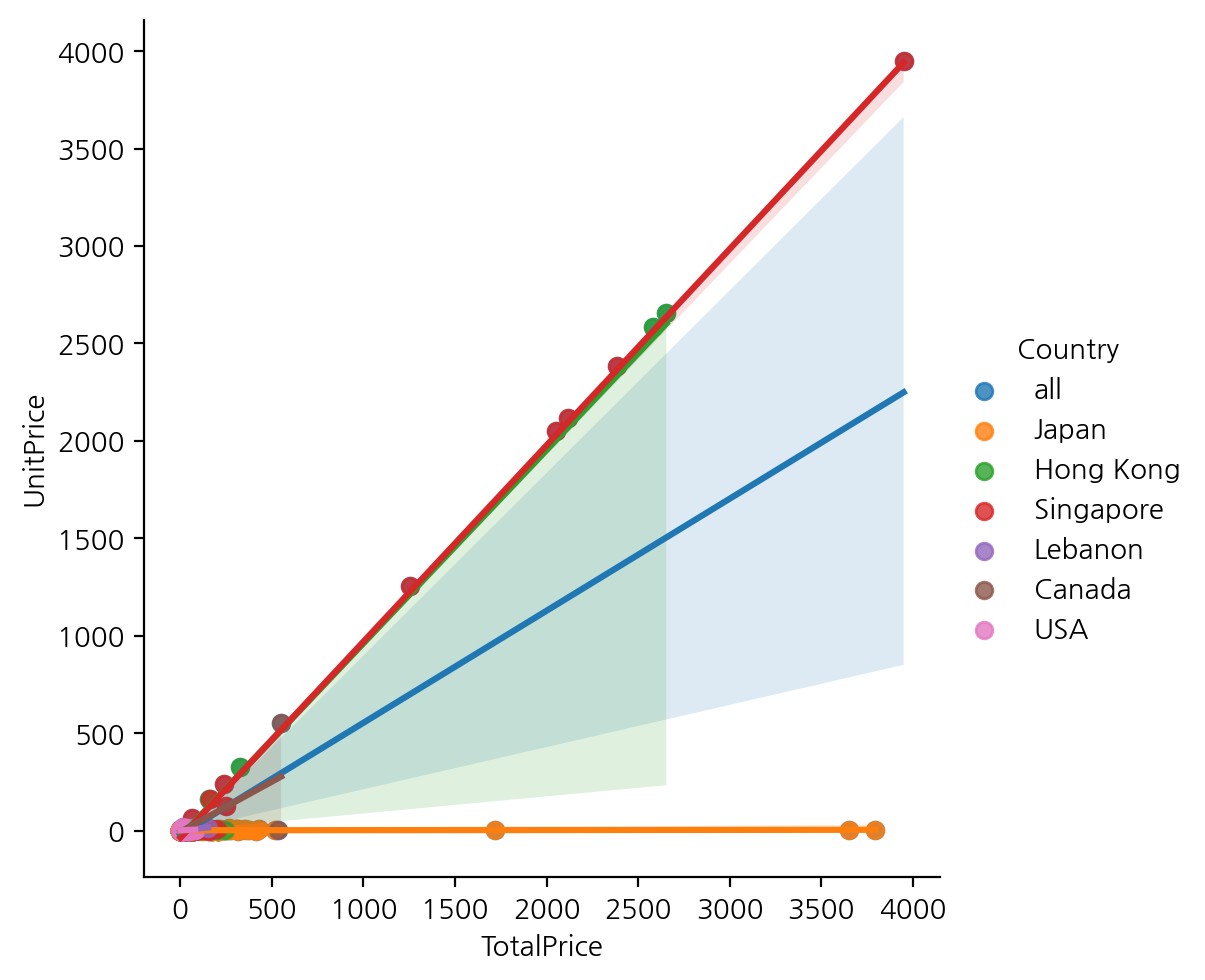

In [12]:
# 시각화
sns.lmplot(data=country_filtered, x="TotalPrice", y="UnitPrice", hue="Country")

시각화를 하여 'UnitPrice' 와 'TotalPrice'의 상관관계를 확인하였을 때 <br/>
전체적으로 물품의 가격이 올라갈수록 전체 판매량이 늘어나지만 일본은 예외로 물품의 가격이 올라갈수록 판매량이 낮아지는 것이 확인되어 일본은 다른 나라들과 다른 비지니스 전략을 세워야 할 것으로 보여집니다.

## 미션2) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalSales)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [13]:
import statsmodels.api as sm
# 데이터 전처리
# 결측치 제거 또는 대체
df = df.dropna(subset=['UnitPrice', 'TotalPrice'])

# 단순 회귀분석
# 독립변수: UnitPrice, 종속변수: TotalPrice
X = df['UnitPrice']
y = df['TotalPrice']
X = sm.add_constant(X) # 상수항 추가

In [14]:
model = sm.OLS(y, X)

In [15]:
results = model.fit()

In [16]:
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                 1.020e+04
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        05:06:16   Log-Likelihood:            -3.7156e+06
No. Observations:              530104   AIC:                         7.431e+06
Df Residuals:                  530102   BIC:                         7.431e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0802      0.370     43.463      0.0

coef(UnitPrice)가 1.0343로 UnitPrice가 1 증가할 때마다 TotalPrice가 1.0343 증가함으로 격이 높은 품목의 총 판매량이 더 높은 경향이 있지만<br/>
r2는 0.019로 UnitPrice만으로는 TotalPrice를 예측하기 어려워 보여
TotalPrice에 다른 요소들이 영향을 많이 미치는 것으로 보여집니다.


## 미션3) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df_promotion["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [17]:
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리(12월 24일 ~ 연말까지를 프로모션 기간으로 설정)
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] <= "2010-12-24"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

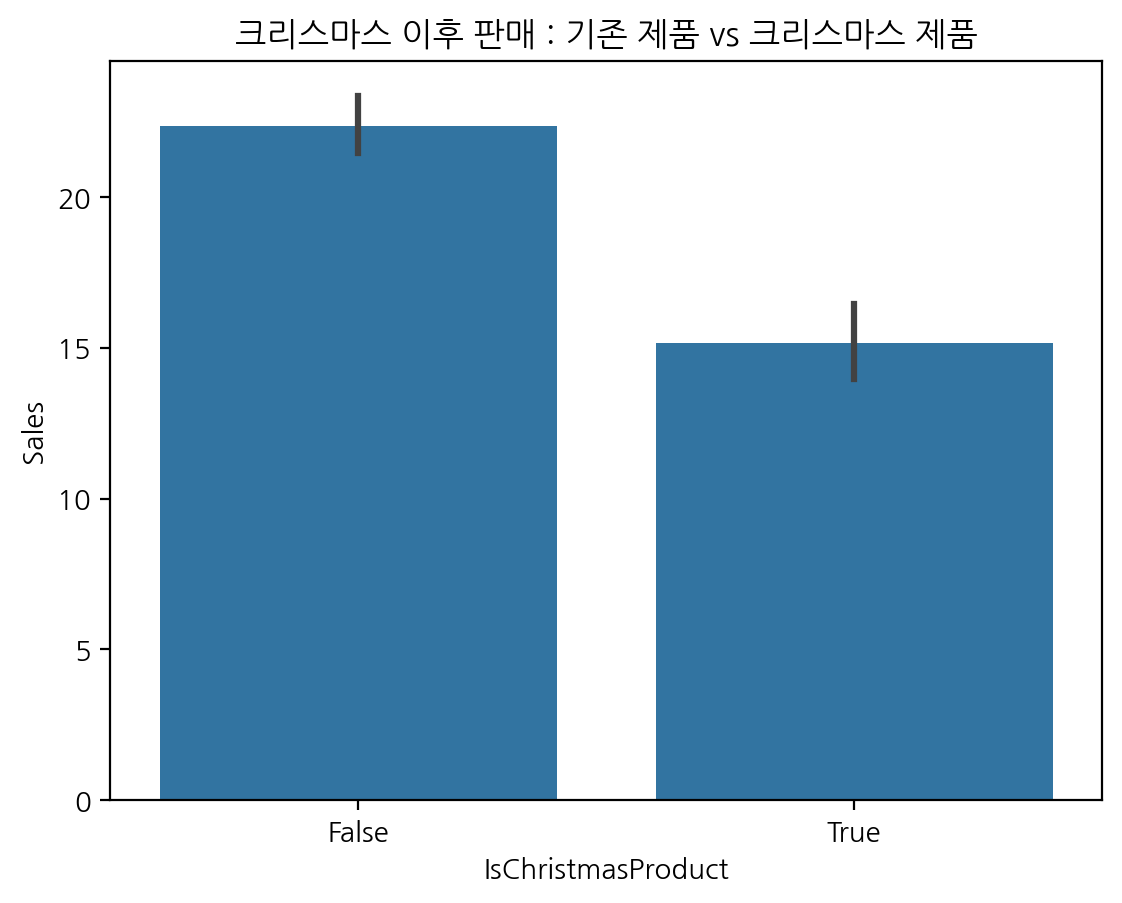

In [18]:
# 'Sales' 열을 추가(수량 * 단가)
df_promotion['Sales'] = df_promotion['Quantity'] * df_promotion['UnitPrice']

# 매출 차이 분석
# 크리스마스 기간 동안 크리스마스 제품과 크리스마스 제품이 아닌 것의 평균 매출을 비교
christmas_period_sales = df_promotion[df_promotion['IsChristmasPeriod']]
non_christmas_period_sales = df_promotion[~df_promotion['IsChristmasPeriod']]

# 시각화
sns.barplot(x='IsChristmasProduct', y='Sales', data=df_promotion)
plt.title('크리스마스 이후 판매 : 기존 제품 vs 크리스마스 제품')
plt.show()

In [20]:
# T-검정
import scipy.stats as stats
import statsmodels.formula.api as smf

christmas_product_sales = christmas_period_sales[christmas_period_sales['IsChristmasProduct']]['Sales']
non_christmas_product_sales = christmas_period_sales[~christmas_period_sales['IsChristmasProduct']]['Sales']

t_stat, p_val = stats.ttest_ind(christmas_product_sales, non_christmas_product_sales, equal_var=False)
print(f"T-통계량: {t_stat}, P-값: {p_val}")

# 크리스마스가 매출에 미치는 영향을 평가하기 위한 회귀 분석
results = smf.ols('Sales ~ IsChristmasPeriod + IsChristmasProduct', data=df_promotion).fit()
print(results.summary())


T-통계량: -8.71765788319426, P-값: 4.10207471791115e-18
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.587
Date:                Fri, 02 Feb 2024   Prob (F-statistic):            0.00138
Time:                        05:06:31   Log-Likelihood:            -1.5061e+05
No. Observations:               26157   AIC:                         3.012e+05
Df Residuals:                   26154   BIC:                         3.012e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

T 검정을 진행했을 때 Prob (F-statistic)이 낮아 통계적으로 유의미하지 않지만
크리스마스 기간임에도 크리스마스 제품보다 기존 재품이 판매량과 매출이 더 높은 것으로 보여집니다.

### 프로모션
고객들은 크리스마스임에도 기존 판매 제품에 더 관심이 많은 것으로 해석할 수 있어 크리스마스 제품 판매량 증진 시키기 위한 전략으로<br/>
크리스마스 제품과 기존 판매 제품을 결합하여 할인 판매하는 프로모션으로 판매량을 증진시킬 수 있을 수 있을 것으로 예상됩니다.

### 재고
시즌성 재품은 판매량이 높지 않아 이후에는 시즌성 상품 추가보다는 기존 제품에 대한 프로모션을 진행하는 것이 효과적일 것으로 예상됩니다.

## 미션4) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
import statsmodels.formula.api as smf
```

In [21]:
import statsmodels.formula.api as smf

In [22]:
# 다변량 회귀분석

df_promotion['IsChristmasProduct'] = df_promotion['IsChristmasProduct'].astype(int)

model = smf.ols(formula='Quantity ~ IsChristmasProduct + UnitPrice + C(Country)', data=df_promotion).fit()

model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     31.87
Date:                Fri, 02 Feb 2024   Prob (F-statistic):          5.46e-138
Time:                        05:13:56   Log-Likelihood:            -1.3687e+05
No. Observations:               26157   AIC:                         2.738e+05
Df Residuals:                   26133   BIC:                         2.740e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        16.8705      8.016      2.104      0.035       1.158      32.583
C(Country)[T.Austria]            -6.0392     17.920     -0.337      0.736     -41.163      29.084
C(Country)[T.Belgium]             3.1887      9.265      0.344      0.731     -14.972      21.349
C(Country)[T.Channel Islands]    -6.9579     13.608     -0.511      0.609     -33.630      19.714
C(Country)[T.Cyprus]             -4.4939      9.433     -0.476      0.634     -22.983      13.995
C(Country)[T.Denmark]             8.3909     12.921      0.649      0.516     -16.935      33.717
C(Country)[T.EIRE]                1.7074      8.390      0.204      0.839     -14.737      18.152
C(Country)[T.Finland]            58.5934     13.605      4.307      0.000      31.927      85.260
C(Country)[T.France]             -3.4033      8.304     -0.410      0.682     -19.679      12.872
C(Country)[T.Germany]            -1.2925      8.260     -0.156      0.876     -17.482      14.898
C(Country)[T.Iceland]            -4.9877     11.424     -0.437      0.662     -27.379      17.404
C(Country)[T.Italy]              -6.6440     10.751     -0.618      0.537     -27.717      14.429
C(Country)[T.Japan]              47.1576      9.790      4.817      0.000      27.969      66.346
C(Country)[T.Lithuania]           3.3680     11.087      0.304      0.761     -18.364      25.100
C(Country)[T.Netherlands]        78.9641      9.631      8.199      0.000      60.086      97.842
C(Country)[T.Norway]              8.3921      8.844      0.949      0.343      -8.942      25.726
C(Country)[T.Poland]              1.9375     17.919      0.108      0.914     -33.184      37.059
C(Country)[T.Portugal]           -6.0620      9.051     -0.670      0.503     -23.803      11.679
C(Country)[T.Spain]              -3.3852      9.572     -0.354      0.724     -22.147      15.376
C(Country)[T.Sweden]            136.1033     11.969     11.371      0.000     112.643     159.564
C(Country)[T.Switzerland]        -0.6570     10.303     -0.064      0.949     -20.852      19.538
C(Country)[T.United Kingdom]     -3.9356      8.019     -0.491      0.624     -19.653      11.782
IsChristmasProduct               -0.7779      1.172     -0.664      0.507      -3.075       1.520
UnitPrice                        -0.5510      0.054    -10.226      0.000      -0.657      -0.445
==============================================================================
Omnibus:                    67557.031   Durbin-Watson:                   1.314
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1893061778.356
Skew:                          29.601   Prob(JB):                         0.00
Kurtosis:                    1319.605   Cond. No.                         841.
==========================================

### R-squared : <br/>
이는 독립변수들이 종속변수 'Quantity'의 변동성을 약 2.7%만 설명한다는 것을 의미합니다. 이는 모델이 데이터의 변동성을 잘 설명하지 못한다는 것을 나타냅니다.<br/>
###F-statistic : <br/>
확률(Prob (F-statistic))이 5.46e-138로 이는 모델이 통계적으로 유의미하다는 것을 나타내며, 사용된 독립변수 중 적어도 하나 이상이 판매량에 유의미한 영향을 준다는 것을 의미합니다.<br/>
###각 국가의 계수(C(Country)[T.CountryName]): <br/>
대부분의 국가들은 통계적으로 유의미하지 않습니다(p-value > 0.05), 그러나 'Finland', 'Japan', 'Netherlands', 'Sweden'는 유의미한 양의 계수를 보입니다. 이는 해당 국가에서 주문된 수량이 더 많음을 의미합니다.<br/>
### IsChristmasProduct <br/>
계수는 -0.7779이며, 이는 크리스마스 관련 상품이 판매량이 더 낮음을 의미하지만, p-value가 0.507로 통계적으로 유의미하지 않습니다.<br/>
### UnitPrice의 계수
-0.5510으로, 단가가 높을수록 판매 수량이 낮아짐을 나타내며, 이는 p-value < 0.0001로 유의미한 결과입니다.<br/>
### 크리스마스 시즌 판매 전략:
- 집중적인 시장 전략: 'Finland', 'Japan', 'Netherlands', 'Sweden'에서 높은 판매 수량을 보이므로, 이러한 국가들에 대한 마케팅 및 재고를 늘려 판매를 강화하는 전략을 고려할 수 있습니다.
- 가격 조정: 단가가 판매 수량에 부정적인 영향을 미친다는 점을 감안할 때, 가격 경쟁력을 갖춘 상품이나 프로모션을 통해 단가를 조정하는 전략이 필요합니다.
- 크리스마스 상품 전략 재고찰: 크리스마스 관련 상품의 판매 수량이 유의미하게 낮지는 않지만, 다른 요인들이 더 큰 영향을 미치므로 크리스마스 관련 상품에 대한 전략을 다각도에서 검토할 필요가 있습니다.

## 보고서:
이러한 분석 결과를 바탕으로, 크리스마스 시즌에는 특정 국가들에 대한 마케팅 활동을 강화하고, 가격 경쟁력을 높여 판매를 촉진할 수 있는 방안을 모색해야 합니다. <br/>
크리스마스 관련 상품의 경우 단순히 시즌성에 의존하기보다는 다른 마케팅 요소들과 결합하여 판매 전략을 수립하는 것이 유리해보입니다.

## 미션5) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = df.dropna()
df = df[df['Description'].str.contains("T-LIGHT HOLDER")]
# 'WHITE HANGING HEART T-LIGHT HOLDER' 상품 구매 여부를 나타내는 타겟 변수 생성
df['Target'] = df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER'
df["Target"].value_counts()

False    6720
True     2028
Name: Target, dtype: int64

In [24]:
# 특성과 타겟 변수 분리
X = pd.get_dummies(df[['UnitPrice', 'Quantity', 'CustomerID', 'Country']])
y = df['Target']


In [25]:
# 4) Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5) Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# 6) Model evaluation
y_pred = logistic_model.predict(X_test)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

(class_report, conf_matrix)

('              precision    recall  f1-score   support\n\n       False       0.78      0.92      0.84      1353\n        True       0.27      0.10      0.15       397\n\n    accuracy                           0.73      1750\n   macro avg       0.52      0.51      0.49      1750\nweighted avg       0.66      0.73      0.68      1750\n',
 array([[1244,  109],
        [ 357,   40]]))

### 정밀도(Precision):
모델이 'x'로 예측한 경우 중 실제로 'x'인 비율

'False'(미구매)는 약 78%
'True'(구매)는 경우 약 27%

### 재현율(Recall):
실제 'x'인 경우 중 모델이 'x'로 올바르게 예측한 비율

'False'의 경우 약 92%
'True'의 경우 약 10%
### F1-점수(F1-Score):
'False'는 약 84%
'True'는 약 15%
### 정확도(Accuracy):
전체적인 모델의 정확도는 약 73%
### 혼동 행렬:
[1244, 109]:
1244은 실제 '미구매'를 '미구매'로 올바르게 예측한 수(True Negative).
109은 실제 '미구매'를 '구매'로 잘못 예측한 수(False Positive).
[357, 40]:

357은 실제 '구매'를 '미구매'로 잘못 예측한 수(False Negative).
40은 실제 '구매'를 '구매'로 올바르게 예측한 수(True Positive).

### 평가:
데이터의 높은 비율이 '미구매'이기 때문에 TN은 높지만 FN 예측 성능이 부족한 것으로 보여집니다. <br/>
FN에 비해 TP 비율이 낮아 구매 예측에 사용하기에는 적합하지 않으며 모델 개선이 필요해보입니다.